In [36]:
import numpy as np
import gym
from hiive.mdptoolbox import example, mdp
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import gc

# set seed
np.random.seed(0)

In [95]:
TERM_STATE_MAP = {"4x4": [5, 7, 11, 12], "8x8": [19, 29, 35, 41, 42, 46, 49, 52, 54, 59], "50x50":[]}
GOAL_STATE_MAP = {"4x4": [15], "8x8": [63], "50x50":[2499]}
cmap = 'coolwarm'
def visualize_env(env, name, title='Frozen Lake Grid Space (4x4)', save_title = 'Frozen Lake Grid Space (4x4)'):
    shape = env.desc.shape
    M = shape[0]
    N = shape[1]
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if i == 0 and j == 0:
                arr[i, j] = 0.0
            elif (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
            else:
                arr[i, j] = 0.5
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(arr, cmap=cmap, alpha=0.7)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2, linestyle='-')
    ax.set_aspect('equal')

    for i in range(M):
        for j in range(N):
            if (i, j) == (0, 0):
                ax.text(j, i, 'S', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, 'F', ha='center', va='center', color='k', size=18)
    ax.tick_params(axis='both', which='major', length=0)
    ax.set_title(title, fontsize=24, pad=10)
    plt.show()
    fig.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/' + save_title + '.png', dpi=600)
    gc.collect()

def visualize_policy(policy, shape, name, title='Frozen Lake Grid Space (4x4)', save_title = 'Frozen Lake Grid Space (4x4)'):
    M = shape[0]
    N = shape[1]
    actions = np.asarray(policy).reshape(shape)
    mapping = {
        0: '←',
        1: '↓',
        2: '→',
        3: '↑'
    }
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if i == 0 and j == 0:
                arr[i, j] = 0.0
            elif (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
            else:
                arr[i, j] = 0.5
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(arr, cmap=cmap, alpha=0.7)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2, linestyle='-')
    ax.set_aspect('equal')

    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, mapping[actions[i, j]], ha='center', va='center', color='k', size=18)
    ax.tick_params(axis='both', which='major', length=0)
    ax.set_title(title, fontsize=24, pad=10)
    plt.show()
    fig.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/' + save_title + '.png', dpi=600)
    gc.collect()

def visualize_value(V, shape, name, title='Frozen Lake Grid Space (4x4)', save_title = 'Frozen Lake Grid Space (4x4)'):
    V = np.asarray(V)
    M = shape[0]
    N = shape[1]
    fig, ax = plt.subplots(figsize=(6,6))
    arr = V.reshape(shape)
    im = ax.imshow(arr, cmap=cmap, alpha=0.7)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2, linestyle='-')
    ax.set_aspect('equal')
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k')
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k')
            else:
                ax.text(j, i, '%.2f' % (arr[i, j]), ha='center', va='center', color='k')
    # fig.tight_layout()
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('State-value estimate', rotation=90, va="bottom")
    ax.tick_params(axis='both', which='major', length=0)
    ax.set_title(title, fontsize=24, pad=10)
    plt.show()
    fig.savefig('C:/Users/sagni/Documents/Personal Files/CS7641/Assignment4/Images/Frozen_lake/' + save_title + '.png', dpi=600)
    gc.collect()
    
def getRewardProb(env, sz):
    sz = int(sz**2)
    r = np.zeros((4,sz,sz))
    p = np.zeros((4,sz,sz))
    envP = env.unwrapped.P
    for state in envP:
        for action in envP[state]:
            transitions = envP[state][action]
            for t_idx in range((len(transitions))):
                new_state = transitions[t_idx][1]
                trans_prob = transitions[t_idx][0]
                reward = transitions[t_idx][2]
                p[action][state][new_state] += trans_prob
                r[action][state][new_state] += reward
            p[action,state,:] /= np.sum(p[action,state,:])
    return r, p

### Setup

C:\Users\sagni\anaconda3\envs\Python_3_10_11\lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


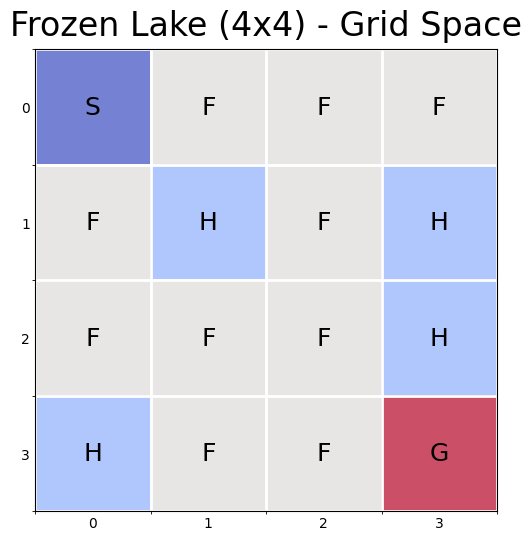

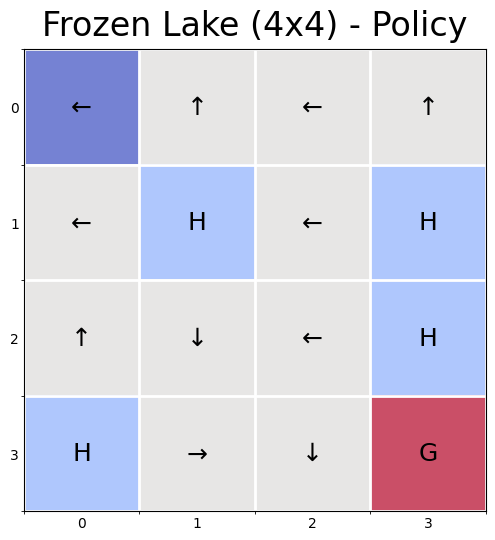

In [97]:
s = 4

opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", map_name=opt)
env.reset()
env.render()
visualize_env(env, opt, title='Frozen Lake (4x4) - Grid Space', save_title = 'FL4x4_GridSpace')
r, p = getRewardProb(env, s)
vi = mdp.ValueIteration(p, r, 0.9, max_iter=10000)
vi.run()
visualize_policy(vi.policy, sz, opt, title='Frozen Lake (4x4) - Policy', save_title = 'FL4x4_GridSpace_Policy')

# VI

In [114]:
# Error is defined at line 1180 of:
# https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/mdp.py
# It's the change in Q, AKA dQ
def valueIterateGraph(p, r, value_iterate=True):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    gammas = list(np.arange(0.55,1,0.1))
    print(gammas)
    for gamma in gammas:
        if value_iterate:
            vi = mdp.ValueIteration(p, r, gamma)
        else:
            vi = mdp.PolicyIteration(p, r, gamma, max_iter=50)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])

    display(vi.run_stats)
    f, ax = plt.subplots(2,2, figsize=(15,12))
    ax[0][0].set_title("Max V", fontsize=16)
    for i in range(len(max_vs)):
        ax[0][0].plot(iterations[i], max_vs[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[0][0].legend()
    ax[0][0].set_xlabel("# Iterations")

    ax[0][1].set_title("Mean V", fontsize=16)
    for i in range(len(mean_vs)):
        ax[0][1].plot(iterations[i], mean_vs[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[0][1].legend()
    ax[0][1].set_xlabel("# Iterations")

    ax[1][0].set_title("Error", fontsize=16)
    for i in range(len(errors)):
        ax[1][0].plot(iterations[i], errors[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[1][0].legend()
    ax[1][0].set_xlabel("# Iterations")

    ax[1][1].set_title("Reward", fontsize=16)
    for i in range(len(max_vs)):
        ax[1][1].plot(iterations[i], rewards[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[1][1].legend()
    ax[1][1].set_xlabel("# Iterations")
    plt.plot()

[0.55, 0.65, 0.75, 0.85, 0.95]


[{'State': None,
  'Action': None,
  'Reward': 0.3333333333333333,
  'Error': 0.3333333333333333,
  'Time': 0.0,
  'Max V': 0.3333333333333333,
  'Mean V': 0.010416666666666666,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.4388888888888889,
  'Error': 0.10555555555555557,
  'Time': 0.0,
  'Max V': 0.4388888888888889,
  'Mean V': 0.017013888888888887,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.5057407407407407,
  'Error': 0.06685185185185186,
  'Time': 0.0,
  'Max V': 0.5057407407407407,
  'Mean V': 0.022758969907407407,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.5480802469135801,
  'Error': 0.05292438271604935,
  'Time': 0.0,
  'Max V': 0.5480802469135801,
  'Mean V': 0.027555242091049377,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 0.5782471450617284,
  'Error': 0.0402225308641975,
  'Time': 0.0,
  'Max V': 0.5782471450617284,
  'Mean V': 0.03174508905606995,
  'Iteration': 5},
 {'State': No

ValueError: cannot reshape array of size 64 into shape (4,4)

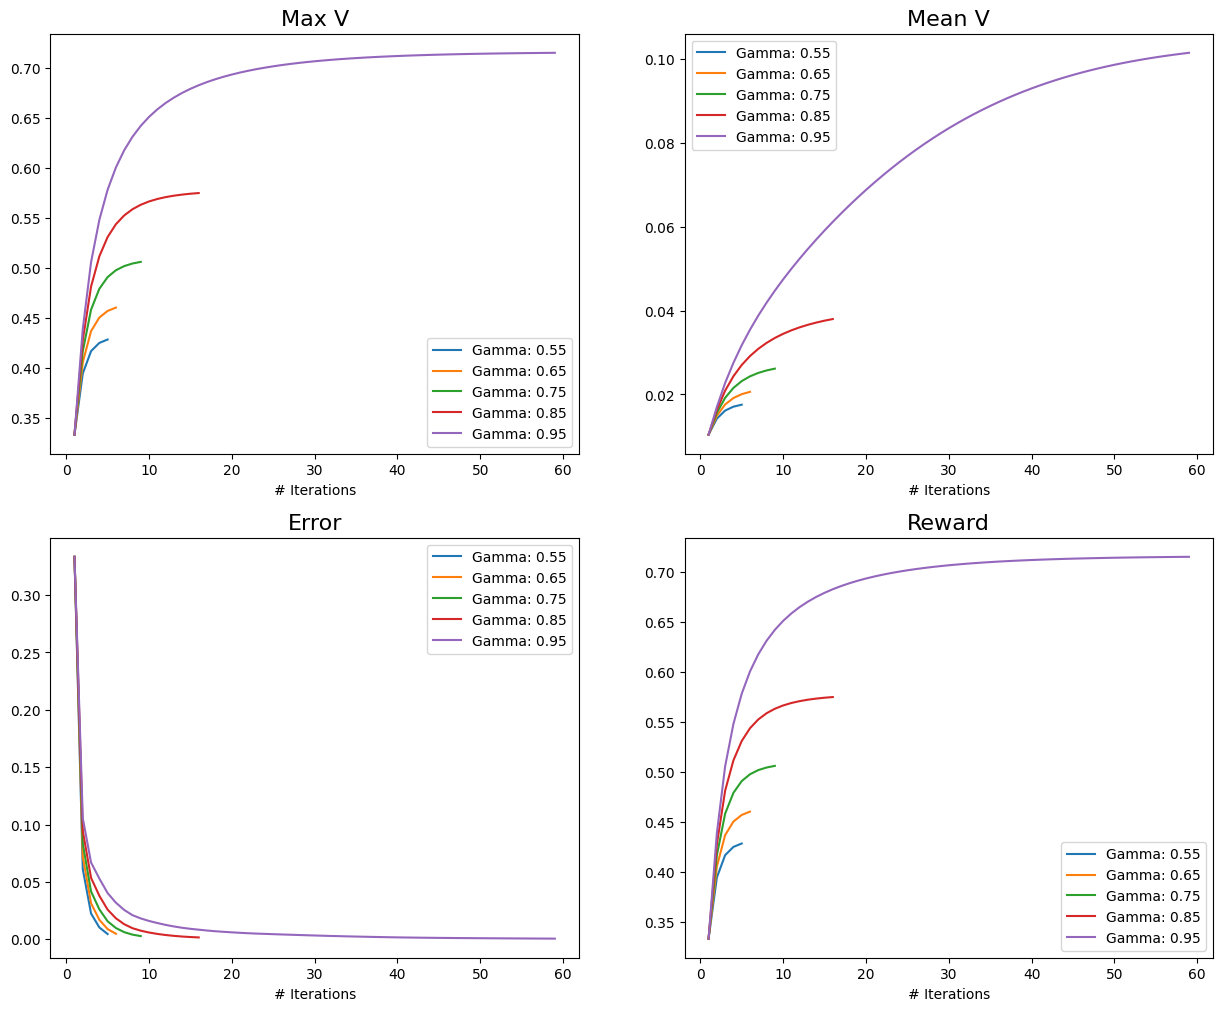

In [119]:
from time import time
s = 8
opt = "{}x{}".format(s,s)
tic = time()
env = gym.make("FrozenLake-v1", is_slippery=True, map_name=opt)
r, p = getRewardProb(env,s)
vi = mdp.ValueIteration(p, r, 0.99, max_iter=10000)
vi.run()
valueIterateGraph(p, r)
visualize_policy(vi.policy, (4,4), "4x4")
print(time()-tic)